# Hello PyTorch 301 with class for Datasets and Dataloaders, Model Saving with Linear Regression Example

In [5]:
# Prerequisites
import numpy as np
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader

### Get Dataset

In [2]:
data_file = 'data/cars.csv'
df_cars = pd.read_csv(data_file)
df_cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Visualize Data

<Axes: xlabel='wt', ylabel='mpg'>

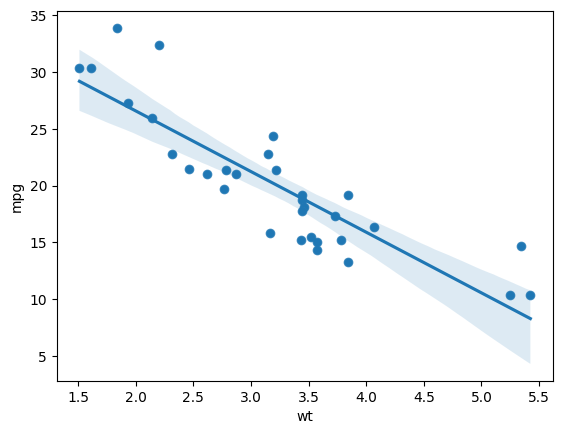

In [3]:
sns.scatterplot(x='wt', y='mpg', data=df_cars)
sns.regplot(x='wt', y='mpg', data=df_cars)

### Convert Data to Tensors

In [4]:
X_list = df_cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = df_cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

### Create DataSet and DataLoader

In [6]:
class LinearRegressionDateSet(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_loader = DataLoader(dataset=LinearRegressionDateSet(X_np, y_np), batch_size=2)

### Create Model Class

In [7]:
# Simple Linear Regression Model Class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

### Instatiate Model

In [8]:
# Instantiate Model
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


### Define Hyperparameters

In [9]:
# Use Mean Squared Error Loss Function
loss_func = nn.MSELoss()

# Learning Rate
LR = 0.02

# Optimizer Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

# Number of Epochs
NR_EPOCHS = 1000

# Batch Size
BATCH_SIZE = 2

In [14]:
# Check train_loader
for i, data in enumerate(train_loader):
    print(f'Batch {i}: {data}')

# Separate X and y from data
for i, (X, y) in enumerate(train_loader):
    print(f'Batch {i}: X = {X}, y = {y}')



Batch 0: [tensor([[2.6200],
        [2.8750]]), tensor([[21.],
        [21.]])]
Batch 1: [tensor([[2.3200],
        [3.2150]]), tensor([[22.8000],
        [21.4000]])]
Batch 2: [tensor([[3.4400],
        [3.4600]]), tensor([[18.7000],
        [18.1000]])]
Batch 3: [tensor([[3.5700],
        [3.1900]]), tensor([[14.3000],
        [24.4000]])]
Batch 4: [tensor([[3.1500],
        [3.4400]]), tensor([[22.8000],
        [19.2000]])]
Batch 5: [tensor([[3.4400],
        [4.0700]]), tensor([[17.8000],
        [16.4000]])]
Batch 6: [tensor([[3.7300],
        [3.7800]]), tensor([[17.3000],
        [15.2000]])]
Batch 7: [tensor([[5.2500],
        [5.4240]]), tensor([[10.4000],
        [10.4000]])]
Batch 8: [tensor([[5.3450],
        [2.2000]]), tensor([[14.7000],
        [32.4000]])]
Batch 9: [tensor([[1.6150],
        [1.8350]]), tensor([[30.4000],
        [33.9000]])]
Batch 10: [tensor([[2.4650],
        [3.5200]]), tensor([[21.5000],
        [15.5000]])]
Batch 11: [tensor([[3.4350],
        [3

### Define Training Loop

In [15]:
# Lists to store loss and parameters
losses, slope, bias = [], [], []

for epoch in range(NR_EPOCHS):

    for i, (X, y) in enumerate(train_loader):
        
        # Set gradients to zero
        optimizer.zero_grad()

        # Forward pass: Compute predicted y by passing batch_size number of samples to the model
        y_pred = model(X)

        # Compute loss
        loss = loss_func(y_pred, y)
        loss.backward()  # Calculate gradients

        # update weights
        optimizer.step()

    # Get parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                #slope.append(param.data.numpy()[0][0])
                slope.append(param.item())
            if name == 'linear.bias':
                #bias.append(param.data.numpy()[0])
                bias.append(param.item())

    # Store loss
    losses.append(loss.item())

    # Print every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}: loss = {loss.item():.4f}')


Epoch 1: loss = 35.7807
Epoch 101: loss = 1.5687
Epoch 201: loss = 1.4115
Epoch 301: loss = 1.4094
Epoch 401: loss = 1.4094
Epoch 501: loss = 1.4094
Epoch 601: loss = 1.4094
Epoch 701: loss = 1.4094
Epoch 801: loss = 1.4094
Epoch 901: loss = 1.4094


### Visualize Parameters

<Axes: >

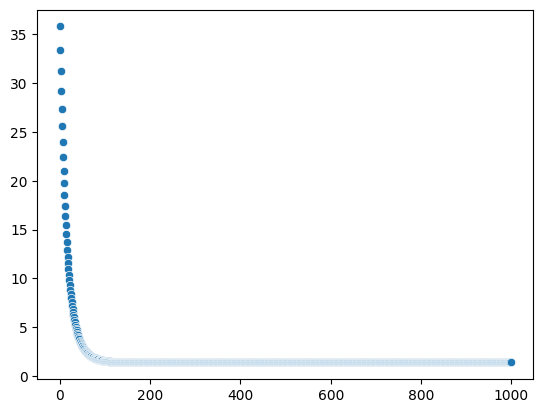

In [16]:
# Visualize losses
sns.scatterplot(x=range(NR_EPOCHS), y=losses)

<Axes: >

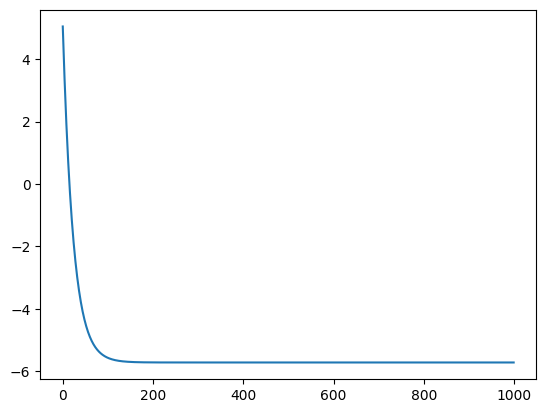

In [17]:
# Visualize slope
sns.lineplot(x=range(NR_EPOCHS), y=slope)

<Axes: >

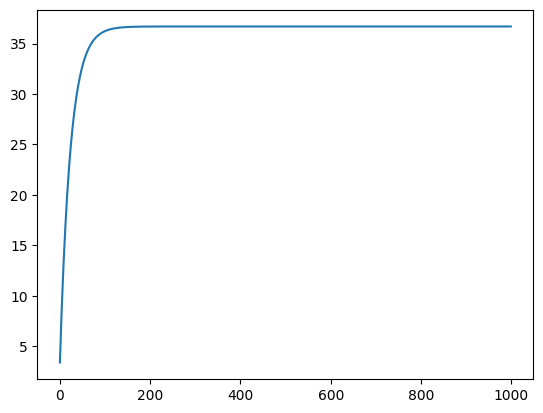

In [18]:
# Visualize bias
sns.lineplot(x=range(NR_EPOCHS), y=bias)

### Model Saving

In [26]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[-5.7225]])),
             ('linear.bias', tensor([36.6935]))])

In [ ]:
# Save model state dict
torch.save(model.state_dict(), 'saved_models/Hello_PyTorch_301_model_state_dict.pth')

### Load the Model

In [30]:
model = LinearRegressionModel(input_dim=input_dim, output_dim=output_dim)
model.state_dict()  # randomly initialized


OrderedDict([('linear.weight', tensor([[0.2445]])),
             ('linear.bias', tensor([-0.8764]))])

In [ ]:
model.load_state_dict(torch.load('saved_models/Hello_PyTorch_301_model_state_dict.pth'))
model.state_dict()

OrderedDict([('linear.weight', tensor([[-5.7225]])),
             ('linear.bias', tensor([36.6935]))])